<a href="https://colab.research.google.com/github/BHRA2004/Stock_Price_Prediction_Analysis/blob/main/Stock_Price_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the ticker symbol: AAPL
Enter the ticker symbol: MSFT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


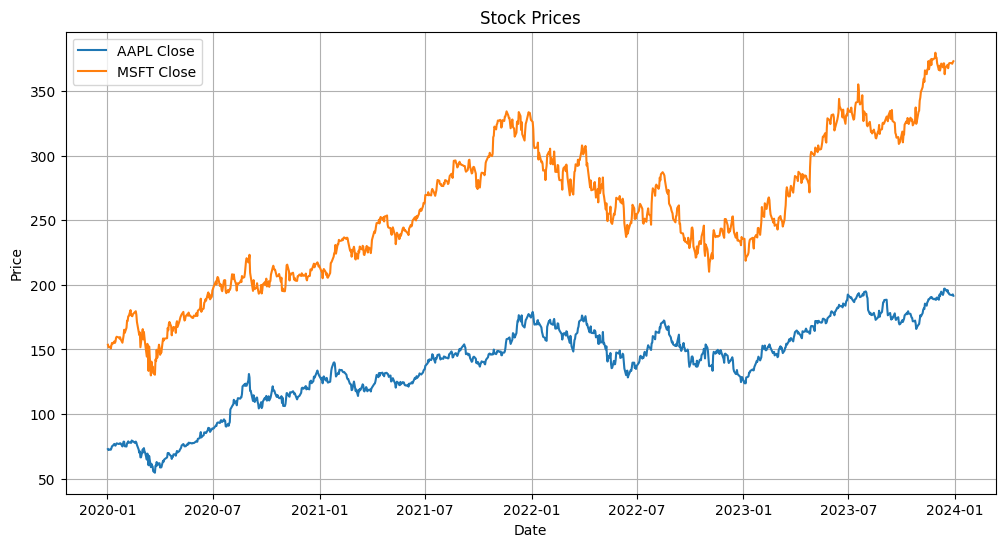

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

ticker_symbol1 = input("Enter the ticker symbol: ")
ticker_symbol2 = input("Enter the ticker symbol: ")
start_date = "2020-01-01"
end_date = "2024-01-01"
data1 = yf.download(ticker_symbol1, start=start_date, end=end_date)
data2 = yf.download(ticker_symbol2, start=start_date, end=end_date)
#print(data)

plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the closing price for AAPL
plt.plot(data1.index, data1['Close'], label=f'{ticker_symbol1} Close')

# Plotting the closing price for MSFT
plt.plot(data2.index, data2['Close'], label=f'{ticker_symbol2} Close')


plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Price')  # Set the y-axis label
plt.title('Stock Prices')  # Set the title of the chart
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability
plt.show()  # Show the plot

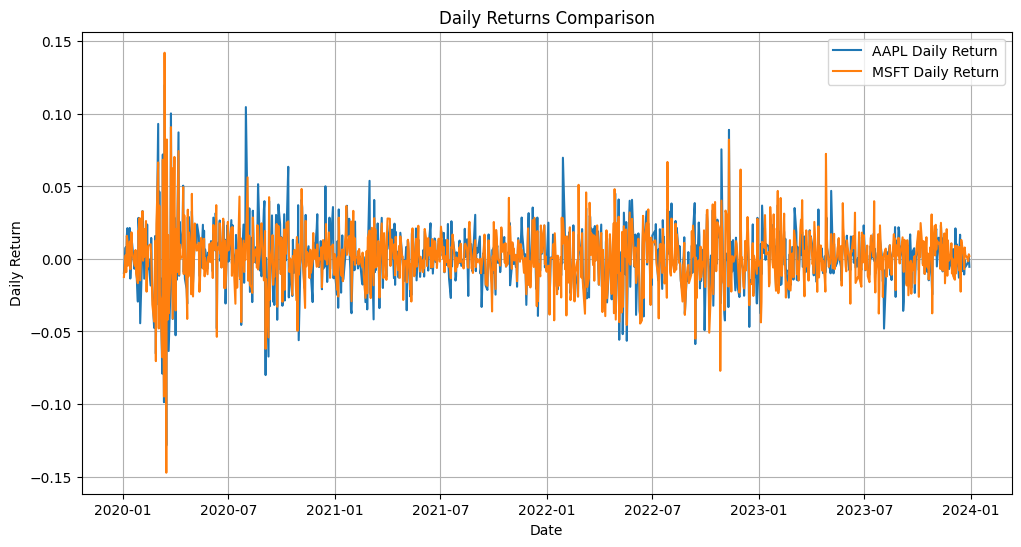

In [2]:
# Calculate daily returns
data1['Daily_Return'] = data1['Close'].pct_change()
data2['Daily_Return'] = data2['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Daily_Return'], label=f'{ticker_symbol1} Daily Return')
plt.plot(data2.index, data2['Daily_Return'], label=f'{ticker_symbol2} Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Comparison')
plt.legend()
plt.grid(True)
plt.show()

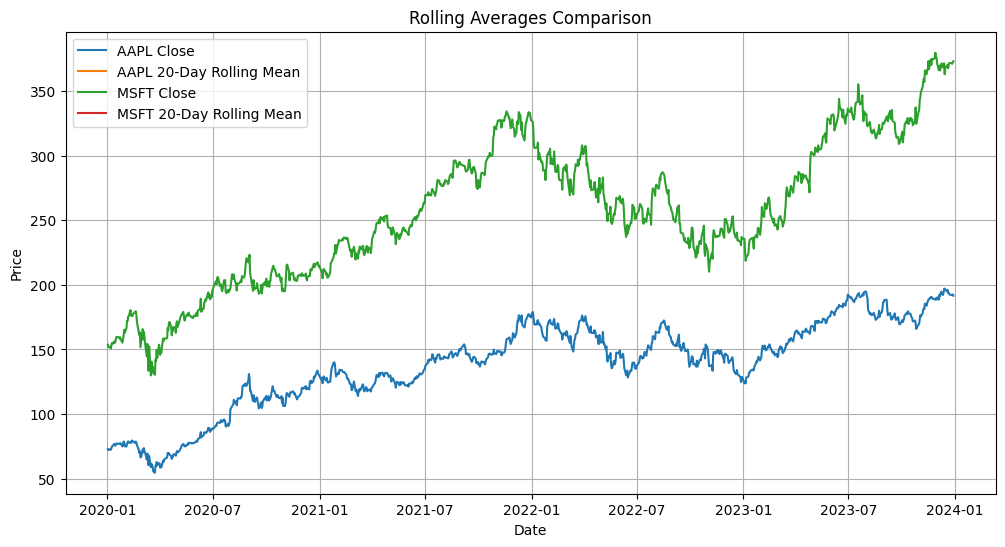

In [9]:
# Calculate rolling averages (e.g., 20-day rolling average)
data1['Rolling_Mean'] = data1['Close'].rolling(window=20).mean()
data2['Rolling_Mean'] = data2['Close'].rolling(window=20).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Close'], label=f'{ticker_symbol1} Close')
plt.plot(data1.index, data1['Rolling_Mean'], label=f'{ticker_symbol1} 20-Day Rolling Mean')
plt.plot(data2.index, data2['Close'], label=f'{ticker_symbol2} Close')
plt.plot(data2.index, data2['Rolling_Mean'], label=f'{ticker_symbol2} 20-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Averages Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Calculate volatility (standard deviation of daily returns)
volatility1 = data1['Daily_Return'].std()
volatility2 = data2['Daily_Return'].std()

print(f"{ticker_symbol1} Volatility: {volatility1}")
print(f"{ticker_symbol2} Volatility: {volatility2}")

AAPL Volatility: 0.021145918265701787
MSFT Volatility: 0.020545802384197318


high volatility = high risk

In [13]:
# Merge based on Date
df = data1[['Close']].merge(data2[['Close']], left_index=True, right_index=True, suffixes=('_AAPL', '_MSFT'))

# Compute correlation
correlation = df.corr().iloc[0, 1]  # Pearson correlation between AAPL & MSFT
print(f"Correlation between {ticker_symbol1} and {ticker_symbol2}: {correlation:.2f}")


Correlation between AAPL and MSFT: 0.94
